In [1]:
import os, sys
from PIL import Image
from PIL import ImageFilter
from scipy.misc import imresize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im = Image.open('Untitled.png')

In [3]:
pix = im.load()

In [4]:
print im.size

(1984, 1393)


In [5]:
sky = np.zeros((im.size[1]-1, im.size[0], 3))
for ib in range(3): 
    skyi = np.zeros((im.size[1], im.size[0]))
    for ic in range(im.size[1]):
        for ir in range(im.size[0]): 
            skyi[ic, ir] = pix[ir, ic][ib]
            
    sky[...,ib] = imresize(skyi, (sky.shape[0], sky.shape[1]))

In [6]:
print sky.shape

(1392, 1984, 3)


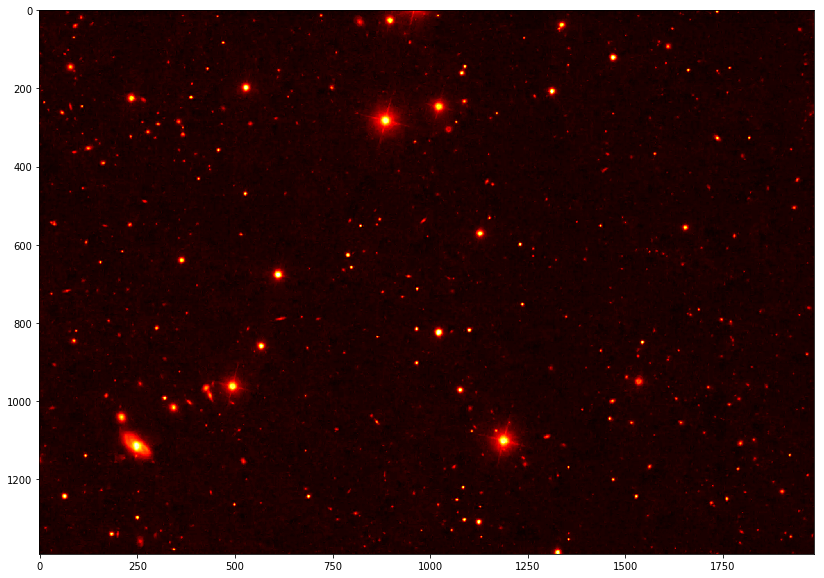

In [7]:
plt.figure(figsize=(20, 10))
plt.imshow(sky[...,0], interpolation='None', cmap='hot')

In [8]:
bright = np.zeros(sky.shape)
for ib in range(3):
    bright_cut = np.mean(sky[...,ib]) + 2.*np.std(sky[...,ib])
    for ic in range(sky.shape[0]):
        for ir in range(sky.shape[1]): 
            if sky[ic,ir,ib] > bright_cut: 
                bright[ic,ir,ib] = sky[ic,ir,ib]

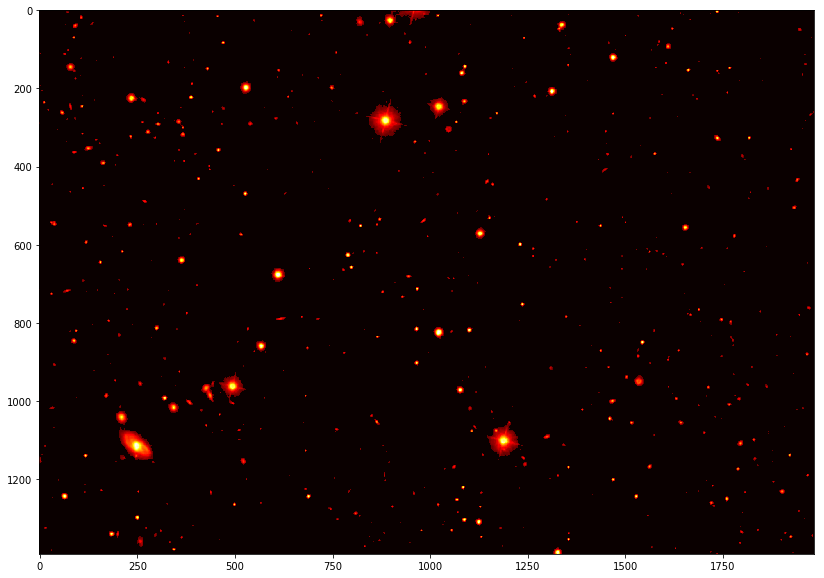

In [9]:
plt.figure(figsize=(20, 10))
plt.imshow(bright[...,0], interpolation='None', cmap='hot')

In [30]:
for i in range(300): 
    rgbArray = np.zeros(sky.shape, 'uint8')

    m = np.random.choice(sky.shape[0] * sky.shape[1], int(sky.shape[0] * sky.shape[1] * 0.05))
    mask = np.zeros(sky.shape[0] * sky.shape[1])
    mask[m] = 1. 
    mask = mask.reshape((sky.shape[0], sky.shape[1]))
    
    for ib in range(3): 
        rgbArray[...,ib] = (0.25*sky[...,ib]+2.*mask*bright[...,ib]).astype('uint8')

    img = Image.fromarray(rgbArray)
    img.filter(ImageFilter.GaussianBlur(10))
    img.save('sky'+str(i)+'.jpeg')

In [17]:
mandt = Image.open('mandt.png')
ppix = mandt.load()

In [18]:
mt = np.zeros(mandt.size[::-1]+(3,))
for ib in range(3): 
    for ic in range(mt.shape[0]):
        for ir in range(mt.shape[1]): 
            mt[ic, ir,ib] = ppix[ir, ic][ib]

In [19]:
mtt = np.zeros(sky.shape)
for ib in range(3): 
    mtt[...,ib] = imresize(mt[...,ib], (sky.shape[0], sky.shape[1]))

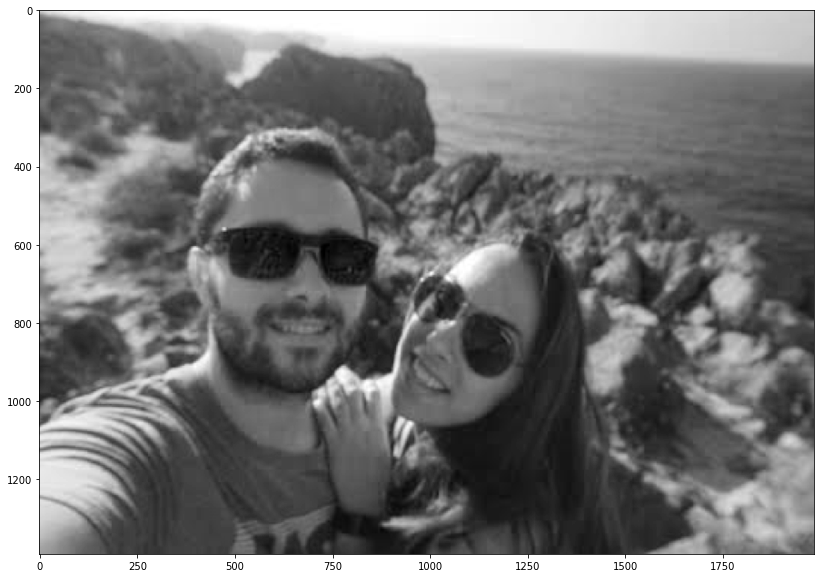

In [20]:
plt.figure(figsize=(20, 10))
plt.imshow(mtt[...,0], interpolation='None', cmap='gray')

In [21]:
mt_bright = np.zeros(mtt.shape)
for ib in range(3): 
    mt_bright_cut = np.mean(mtt[...,ib]) - 0.5 * np.std(mtt[...,ib])
    for ic in range(mtt.shape[0]):
        for ir in range(mtt.shape[1]): 
            if mtt[ic,ir,ib] > mt_bright_cut: 
                mt_bright[ic,ir,ib] = np.abs(np.random.standard_cauchy())#1. #mtt[ic,ir,ib]

In [23]:
#sampled = np.array([])
rgb_coeff = [0.299, 0.587, 0.114]
for i in range(300): 
    rgbArray = np.zeros(sky.shape, 'uint8')

    m = np.random.choice(sky.shape[0] * sky.shape[1], int(sky.shape[0] * sky.shape[1] * 0.1))
    mask = np.zeros(sky.shape[0] * sky.shape[1])
    mask[m] = 1. 
    mask = mask.reshape((sky.shape[0], sky.shape[1]))
    
    #sampled = np.concatenate([sampled, np.random.choice(sky.shape[0] * sky.shape[1], 10000*i)])
    sampled = np.random.choice(sky.shape[0] * sky.shape[1], 1000*i)
    mt_mask = np.zeros(sky.shape[0]*sky.shape[1])
    mt_mask[sampled.astype('int')] = 1. 
    mt_mask = mt_mask.reshape((sky.shape[0], sky.shape[1]))
    
    for ib in range(3): 
        rgbArray[...,ib] = (0.25*sky[...,ib]+mask*0.55*bright[...,ib]+2.*rgb_coeff[ib]*mt_mask*mt_bright[...,ib]*mtt[...,ib]).astype('uint8')

    img = Image.fromarray(rgbArray)
    #img.filter(ImageFilter.GaussianBlur(10))
    img.save('mt'+str(i)+'.jpeg')

In [24]:
def shootingstar(direc, start=[0,0]): 
    v = 60. # pixel per frame 2000 pixel/second = 
    sstars = [] 
    for i in range(10): 
        sstar = np.zeros((sky.shape[0], sky.shape[1]))
        xi = int(i*v*np.cos(direc / 12. * 2 * np.pi)) + start[0]
        yi = int(i*v*np.sin(direc / 12. * 2 * np.pi)) + start[1]

        try: 
            sstar[xi,yi] = 2.
            sstar[xi-1,yi] = 1.
            sstar[xi+1,yi] = 1.
            sstar[xi,yi-1] = 1.
            sstar[xi,yi+1] = 1.
            sstar[xi+1,yi+1] = 0.5
            sstar[xi+1,yi-1] = 0.5
            sstar[xi-1,yi+1] = 0.5
            sstar[xi-1,yi-1] = 0.5
            for ii in range(100): 
                sstar[xi - int(ii*np.cos(direc / 12. * 2 * np.pi)), yi - int(ii*np.sin(direc / 12. * 2 * np.pi))] = 1. - 0.01*np.float(ii)
            sstars.append(sstar)
            #v *= (i+2)
        except IndexError: 
            continue
    return sstars

In [29]:
messages = []
for i in range(4): 
    mm = Image.open('message'+str(i)+'.jpg')
    mpix = mm.load()

    message = np.zeros((mm.size[1], mm.size[0], 3))
    
    for ib in range(3): 
        messi = np.zeros((mm.size[1], mm.size[0]))
        for ic in range(mm.size[1]):
            for ir in range(mm.size[0]): 
                messi[ic, ir] = mpix[ir, ic][ib]
                
        message[...,ib] = messi
        
    messages.append(message)

In [32]:
starts = []
n_frames = 30*10
n_star = 100
start_frame = np.random.choice(range(n_frames), replace=True, size=n_star)
for ii in range(len(start_frame)): 
    xx = [0, 500, 1000, 1400, 1980]
    yy = [0, 600, 1300]
    starts.append([np.random.choice(xx), np.random.choice(yy)])

stars = [] 
shfl_list = range(n_star)
np.random.shuffle(shfl_list)
for i in shfl_list: 
    stars.append(shootingstar(i+1, start=starts[i]))
    
for ii in range(n_frames): 
    im_star = np.zeros((sky.shape[0], sky.shape[1]))
    for iii in range(len(stars)): 
        if ii >= start_frame[iii]: 
            try: 
                im_star += stars[iii][ii-start_frame[iii]]
            except IndexError: 
                continue
    if ii < np.float(n_frames)*0.25: 
        mess = messages[0]
    elif (ii >= np.float(n_frames)*0.25) and (ii < np.float(n_frames)*0.5):
        mess = messages[1]
    elif (ii >= np.float(n_frames)*0.5) and (ii < np.float(n_frames)*0.75):
        mess = messages[2]
    elif (ii >= np.float(n_frames)*0.75):
        mess = messages[3]
        
    for ib in range(3): 
        rgbArray[...,ib] = (0.25*sky[...,ib]+mask*0.55*bright[...,ib]+rgb_coeff[ib]*mt_mask*mt_bright[...,ib]*mtt[...,ib] + 1000.*im_star + mess[...,ib]).astype('uint8')

    img = Image.fromarray(rgbArray)
    img.save('ss'+str(ii)+'.jpeg')